In [1]:
#reference split_GEX_to_GEX-ATAC_VAE_dualOutput in WGE_mmJLSAE

In [2]:
# !pip install scanpy
import os
import numpy as np
import pandas as pd
import time
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import model

SyntaxError: duplicate argument 'y_true_right' in function definition (model.py, line 61)

In [ ]:
# os.listdir('../DATA/')

In [4]:
gex_input_df=pd.read_csv('../DATA/gex_input_824_hvf.csv.gz').set_index('Unnamed: 0')
print(gex_input_df.shape)
gex_data = gex_input_df
# gex_tensor = tf.convert_to_tensor(gex_data, dtype=tf.float32)

(5220, 824)


In [5]:
atac_input_df=pd.read_csv('../DATA/atac_input_3024_hvf.csv.gz').set_index('Unnamed: 0')
print(atac_input_df.shape)
atac_data = atac_input_df

(5220, 3024)


In [6]:
for step,batch in enumerate(gex_data):
    print(step)
    break

0


In [15]:
X_train_left, X_test_left, y_train_left, y_test_left = train_test_split(gex_data, gex_data, test_size=0.2, random_state=42,shuffle=True)
print(X_train_left.shape)
print(X_test_left.shape)
print(y_train_left.shape)
print(y_test_left.shape)

(4176, 824)
(1044, 824)
(4176, 824)
(1044, 824)


In [20]:
X_train_right=atac_data.loc[X_train_left.index]
X_test_right=atac_data.loc[X_test_left.index]
y_train_right=atac_data.loc[y_train_left.index]
y_test_right=atac_data.loc[y_test_left.index]
print(X_train_right.shape)
print(X_test_right.shape)
print(y_train_right.shape)
print(y_test_right.shape)

(4176, 3024)
(1044, 3024)
(4176, 3024)
(1044, 3024)


In [8]:
# gex_data

In [21]:
###HERES where to set up the train enumerate
batch_size=256

train_dataset_left=tf.data.Dataset.from_tensor_slices(X_train_left)
train_dataset_left = train_dataset_left.shuffle(buffer_size=1024).batch(batch_size)

test_dataset_left = tf.data.Dataset.from_tensor_slices(X_test_left)
test_dataset_left = test_dataset_left.batch(batch_size)

In [22]:
###HERES where to set up the train enumerate
batch_size=256

train_dataset_right=tf.data.Dataset.from_tensor_slices(X_train_right)
train_dataset_right = train_dataset_right.shuffle(buffer_size=1024).batch(batch_size)

test_dataset_right = tf.data.Dataset.from_tensor_slices(X_test_right)
test_dataset_right = test_dataset_right.batch(batch_size)

In [13]:
for step,batch in enumerate(train_dataset):
    print(step)
    break
batch

0


<tf.Tensor: shape=(256, 824), dtype=float64, numpy=
array([[-0.4778398 , -0.5168974 , -0.1868228 , ...,  0.36944363,
        -0.4251486 , -0.5942526 ],
       [-0.762108  , -0.38390648,  6.4723606 , ...,  1.1555331 ,
        -0.31428936,  0.94212514],
       [ 1.3088304 , -0.37472522, -0.32233936, ...,  1.3975612 ,
        -0.21942247,  1.3320147 ],
       ...,
       [-0.74124354, -0.3892752 , -0.25144118, ..., -1.317186  ,
        -0.33228055, -0.9938994 ],
       [-0.73422724, -0.3626234 , -0.2094696 , ...,  0.06855527,
        -0.402174  ,  2.108385  ],
       [-0.5319645 , -0.4208397 , -0.10656621, ...,  0.7660305 ,
        -0.5627372 , -0.60158604]])>

In [25]:
for index, (row1, row2) in enumerate(zip(train_dataset_left, train_dataset_right)):
    index_name, data1 = row1
    _, data2 = row2
    print(f"Index: {index_name}")
    print("DataFrame 1:")
    print(data1)
    print("DataFrame 2:")
    print(data2)
    print()

ValueError: too many values to unpack (expected 2)

In [26]:
row1

<tf.Tensor: shape=(256, 824), dtype=float64, numpy=
array([[ 1.2374133 , -0.34579813, -0.2610339 , ...,  1.8265027 ,
        -0.32063782,  0.21444711],
       [ 1.1844887 , -0.37126783, -0.26218233, ...,  0.06540804,
        -0.31656343,  0.9488907 ],
       [-0.21216147, -0.6463437 , -0.12261364, ..., -0.0549474 ,
         1.2449778 , -0.19192809],
       ...,
       [ 1.0309473 , -0.4467343 ,  4.003359  , ..., -1.6226267 ,
        -0.37608057,  1.4538685 ],
       [-0.77976215, -0.34671354, -0.22888066, ..., -1.4228419 ,
        -0.37231708,  1.3389376 ],
       [-0.5848595 , -0.48757055, -0.24324739, ...,  0.44323125,
        -0.33688095, -0.7807504 ]])>

In [27]:
row2

<tf.Tensor: shape=(256, 3024), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])>

In [8]:
vae=model.VAE(X_train.shape[1],epochs=3000)


In [9]:
len(X_train)/batch_size

16.3125

In [10]:
vae.train_vae(train_dataset,test_dataset)


Start of epoch 0
Training loss (for one batch) at step  0 tf.Tensor(266.2152245936266, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 1.1124
KL Divergence: 2.5771028996
Validation acc: 1.0683

Start of epoch 1
Training loss (for one batch) at step  0 tf.Tensor(216.0253657266308, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 1.0451
KL Divergence: 4.4377522469
Validation acc: 1.0049

Start of epoch 2
Training loss (for one batch) at step  0 tf.Tensor(210.02779183751161, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.9648
KL Divergence: 6.5488595963
Validation acc: 0.9279

Start of epoch 3
Training loss (for one batch) at step  0 tf.Tensor(194.770174634146, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.9049
KL Divergence: 7.6567230225
Validation acc: 0.8873

Start of epoch 4
Training loss (for one batch) at step  0 tf.Tensor(186.33472686513807, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.

Reconstruction Training acc over epoch: 0.8141
KL Divergence: 8.8824024200
Validation acc: 0.8144

Start of epoch 40
Training loss (for one batch) at step  0 tf.Tensor(169.93822720663798, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8135
KL Divergence: 8.6362714767
Validation acc: 0.8149

Start of epoch 41
Training loss (for one batch) at step  0 tf.Tensor(172.14929493708493, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8131
KL Divergence: 9.6672286987
Validation acc: 0.8141

Start of epoch 42
Training loss (for one batch) at step  0 tf.Tensor(170.65986457916637, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8125
KL Divergence: 8.0611515045
Validation acc: 0.8145

Start of epoch 43
Training loss (for one batch) at step  0 tf.Tensor(172.96849754946047, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8120
KL Divergence: 9.0221920013
Validation acc: 0.8132

Start of epoch 44
Training loss (for one batch) a

Reconstruction Training acc over epoch: 0.8035
KL Divergence: 9.4246129990
Validation acc: 0.8063

Start of epoch 79
Training loss (for one batch) at step  0 tf.Tensor(169.1227110382591, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8039
KL Divergence: 9.2023067474
Validation acc: 0.8049

Start of epoch 80
Training loss (for one batch) at step  0 tf.Tensor(166.33233234988774, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8042
KL Divergence: 9.2164382935
Validation acc: 0.8043

Start of epoch 81
Training loss (for one batch) at step  0 tf.Tensor(168.57018182940092, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8037
KL Divergence: 8.0180797577
Validation acc: 0.8048

Start of epoch 82
Training loss (for one batch) at step  0 tf.Tensor(168.43827475991026, shape=(), dtype=float64)
Reconstruction Training acc over epoch: 0.8035
KL Divergence: 7.9721984863
Validation acc: 0.8053

Start of epoch 83
Training loss (for one batch) at

In [11]:
predictions = vae.predict(X_test)

In [13]:
vae.correlation_accuracy(X_test.to_numpy())
# vae.mse_error(X_train)
vae.mse_error(X_test.to_numpy())

0.4192012463737262
0.8049319311028287


In [14]:
predictions=pd.DataFrame(predictions,columns=X_test.columns,index=X_test.index)
predictions.to_csv('DATA/custom824_pred.csv.gz')

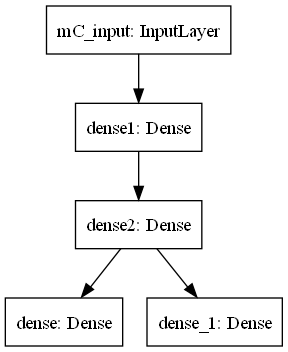

In [15]:
plot_model(vae.encoder)


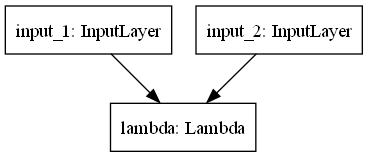

In [16]:
plot_model(vae.sampler)

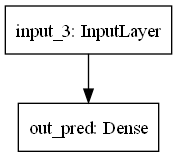

In [17]:
plot_model(vae.decoder)

In [18]:
vae.model_summary()

Encoder Summary:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mC_input (InputLayer)           [(None, 824)]        0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 128)          105600      mC_input[0][0]                   
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 64)           8256        dense1[0][0]                     
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           2080        dense2[0][0]                     
___________________________________________________________________________